In [130]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import uncertainties as unc
from scipy import stats
from scipy.stats import norm 
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import cauchy
import scipy.constants as const
from tabulate import tabulate
import math
from matplotlib import cm
import matplotlib.cm as cm
import seaborn as sns
from scipy.optimize import minimize
from iminuit import Minuit
%matplotlib inline

In [80]:
import numpy as np
from numpy import random

In [81]:
np.random.seed(32)

In this lab, we will practice different estimation methods to find the probability distribution function
(PDF) which best describes the mass distribution of dataset (Unit: GeV). The PDF function of interest is Cauchy distribution, also known as the Lorentz distribution or the (non-relativistic) Breit–
Wigner distribution (see https://docs.scipy.org/doc/scipy/reference/generated/scipy.
stats.cauchy.html) There are 2 free parameters of the Lorentz distribution: mass and width.

The Lorentz distribution: <br>
\begin{equation}
f(m,\Gamma) = \frac{1}{\pi} \frac{\Gamma/2}{(m-m_0)^2+(\Gamma/2)^2}
\end{equation}

The Cauchy Distribution corresponds to parameter of $\Gamma=2$. The p.d.f. of cauchy is:<br>
\begin{equation}
f(x)=\frac{1}{\pi(1+x^2)}
\end{equation}
For the location parameter $a=0$, the characteristic function is 
\begin{equation}
\phi(t)=e^{|-t|}
\end{equation}
<br>
For the sample mean of N measurements, $\bar{x}=\sum^{N}_{1}\frac{x_i}{N}$ the characteristic function is 
\begin{equation}
\phi_{\bar{x}}(t)=(\phi(t/N))^N=\phi(t)
\end{equation}

The dataset is shown here:

In [82]:
# Copy in Data
mass = [7.95442531,10.60408232,9.9020277,10.42288788,17.2193401,10.06076572,10.00176003,
7.8289388,9.55481385,9.99981543,10.3156156,10.70547087,9.80374407,7.62085689,9.60747351,]
mass = np.asarray(mass)
print(mass)
data=mass

[ 7.95442531 10.60408232  9.9020277  10.42288788 17.2193401  10.06076572
 10.00176003  7.8289388   9.55481385  9.99981543 10.3156156  10.70547087
  9.80374407  7.62085689  9.60747351]


# Task 1 Visualization
1. Draw the unbinned mass distribution (see below for an example of this type of plot).
2. Draw the binned distribution in 1D histogram. Set bin size 0.5 GeV betwen range 0 and 20GeV and show vertical error bar in each bin.


Text(0.5, 1.0, 'Unbinned Mass Distribution')

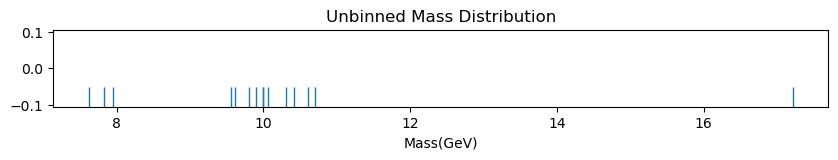

In [83]:
# Draw unbinned distribution using rugplot as in example
fig, ax = plt.subplots(figsize=(10,1))

sns.rugplot(mass, height=0.25)
ax.set_xlabel('Mass(GeV)')
ax.set_title('Unbinned Mass Distribution')

Text(0, 0.5, 'Count')

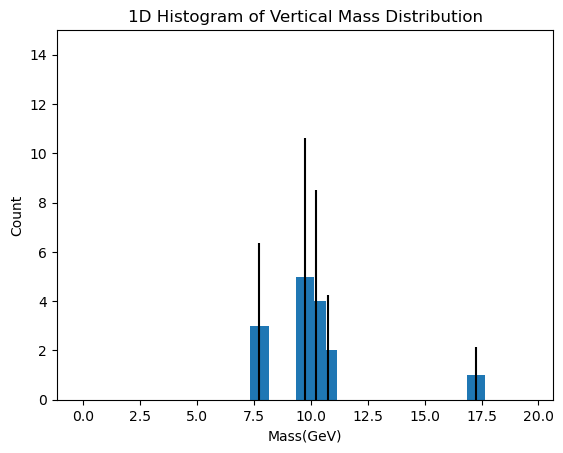

In [84]:
# Draw binned 1D histogram of mass distribution with vertical error bars
bins = np.arange(0, 20, 0.5) # Bin size 0.5 from 0 to 20 GeV
counts, bins, patches = plt.hist(mass, bins=bins) # Get histogram info 

bin_centers = (bins[:-1] + bins[1:]) / 2 # Get bin centers for error bars
errors = np.std(counts) # Calculate yerror

plt.bar(bin_centers, counts, yerr=(counts*errors)) # Use bar graph to create hist. with y error bars

plt.ylim((0,15))
plt.title('1D Histogram of Vertical Mass Distribution')
plt.xlabel('Mass(GeV)')
plt.ylabel('Count')

# Task 2 Maximum Likelihood estimate (4 points)
Using maximum likelihood estimation method to find the probability distribution function.
1. Construct unbinned negative log-likelihood (NLL) function, i.e. −2 ln(𝐿)
2. Scan (𝑚, Γ) in fine step size and find the best estimate parameter (𝑚0, Γ0) which leads to
the minimum NLL, i.e. maximum Likelihood value, −2 ln(𝐿𝑚𝑎𝑥).
3. Plot NLL as function of parameters (mass, width)=(𝑚, Γ) as 2D contour. Choose appropriate
ranges of mass and width so that outer countour is around −2 ln(𝐿𝑚𝑎𝑥 + 5).
4. Plot mass distribution and superpose PDF with the best fit parameter (𝑚0, Γ0)
See example contour plots and fit output plot below (plots are just for illustration purpose).


Given a sample of N observations ${x_1,....,x_N}$, from a p.d.f. $f(x|\theta)$ with unknown parameter $\theta$, the likelihood and its log are: <br>
$L(\theta)=\Pi^N_{i=1}f(x|\theta)$ <br>
$lnL(\theta)=\sum^N_{i=1}lnf(x|\theta)$ <br>

### Likelihood Function for Cauchy Distribution


#### Construct Unbinned NLL Function

In [142]:
# Write in NLL function
def Nll(params, d):
    mass, gamma = params # Two free parameters mass and gamma
    # Define cauchy dist. function for two parameters
    def cpdf(d, mass, gamma):
        return cauchy.pdf(d, loc=mass, scale=gamma)
    # Calculate likelihood
    likelihood = cpdf(d, mass, gamma)
    # Return negative log likelihood (-2lnL)
    return -2 * np.sum(np.log(likelihood),0)

#### Scan (𝑚, Γ) in fine step size and find the best estimate parameter (𝑚0, Γ0) which leads to the minimum NLL, i.e. maximum Likelihood value, −2 ln(𝐿𝑚𝑎𝑥).

In [143]:
# Create arrays for m and g vals to feed into NLL function then combine in grid
mvals = np.linspace(np.min(mass), np.max(mass), 100)
gvals = np.linspace(0.1, 2., 100)

m_grid, g_grid = np.meshgrid(mvals, gvals)

# Initialize array to store NLL values and fill using function
nll_values = np.zeros(m_grid.shape)

for k in range(m_grid.shape[0]):
    for j in range(m_grid.shape[1]):
        nll_values[k, j] = Nll([m_grid[k, j], g_grid[k, j]], data)

# Minimize NLL to get best estimate params m0 and g0        
ends = [(np.min(mass), np.max(mass)), (0.1, 2)]
nll_min = minimize(Nll, [0,1], args=data, bounds=ends)
m0, g0 = nll_min.x

print('mass best estimate:', m0)
print('gamma best estimate', g0)

mass best estimate: 9.99316464849897
gamma best estimate 0.4092217319495443


#### Plot NLL as function of parameters (mass, width)=(𝑚, Γ) as 2D contour. Choose appropriate ranges of mass and width so that outer countour is around −2 ln(𝐿𝑚𝑎𝑥 + 5).

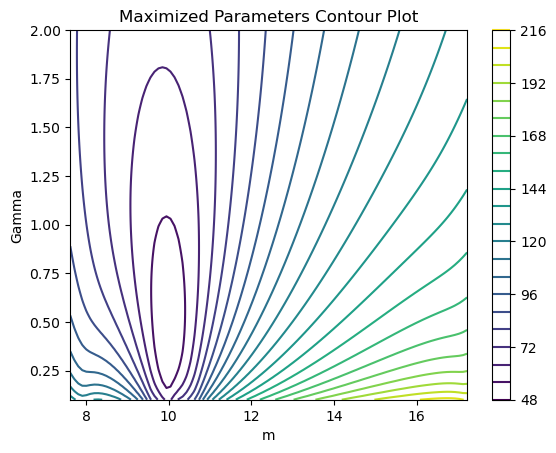

In [144]:
# PLot nll vs. params as  2D contour
plt.contour(m_grid,g_grid,nll_values, levels=20)
plt.title("Maximized Parameters Contour Plot")
plt.xlabel('m')
plt.ylabel('Gamma')
plt.colorbar()
plt.show()

#### Plot mass distribution and superpose PDF with the best fit parameter (𝑚0, Γ0)

Text(0, 0.5, 'density')

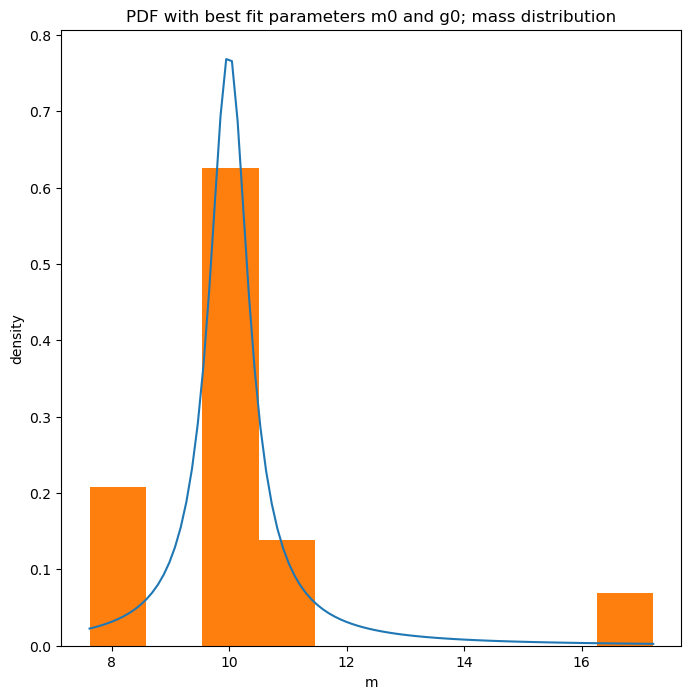

In [146]:
# Define x and y value arrays for plot
x = mvals

# likelihood using best fit params
def c_pdf(m_vals, m0, g0):
    return cauchy.pdf(m_vals, loc=m0, scale=g0)

# Plot mass dist. with PDF using m0 and g0
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(x, c_pdf(x,m0,g0)) # PDF with m0 and g0

# Superpose mass dist. from part 1
ax.hist(mass, density=True)

plt.title('PDF with best fit parameters m0 and g0; mass distribution')
ax.set_xlabel('m')
ax.set_ylabel('density')

# Task 3 Maximum Likelihood vs Chi2 method (3 points)
There are two free parameters of Lorentz distribution, i.e. mass 𝑚 and width Γ. Fix the Γ value
to the best estimate from Task 2 to perform studies below.
1. Plot −2 ln(𝐿/𝐿𝑚𝑎𝑥) as a function of mass in 1D. Choose appropriate mass range so that
−2 ln(𝐿/𝐿𝑚𝑎𝑥) is around 5.
2. Construct binned Chi2 function 𝜒2 based on the histogram with bin size 0.5 GeV betwen
range 0 and 20 GeV. Scan the mass parameter and find the minimum Chi2 𝜒2
𝑚𝑖𝑛. Plot
Δ𝜒2 = 𝜒2(𝑚) − 𝜒2
𝑚𝑖𝑛 as a function of mass.
3. Superpose −2 ln(𝐿/𝐿𝑚𝑎𝑥) in blue and 𝜒2 − 𝜒2
𝑚𝑖𝑛 in organge in one figure. Describe your
obersvation.
See example plot below for illustration purpose.


#### Plot NLL as a function of mass where gamma=g0

Text(0.5, 1.0, 'NLL as a function of mass')

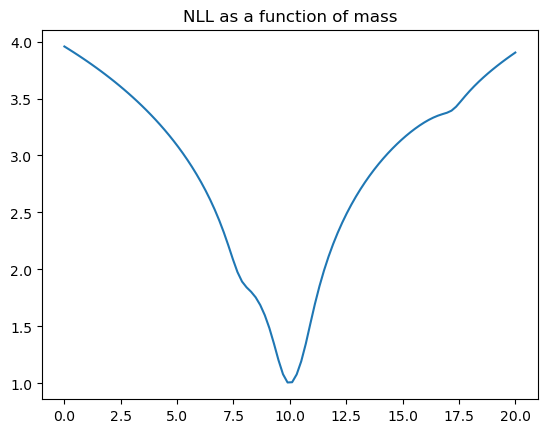

In [147]:
# Define NLL function for 1 param
G = g0
def l(m):
    def cpdf(d, m, gamma):
        return cauchy.pdf(d, loc=m, scale=gamma)
    return -2 * np.sum(np.log(cpdf(data, m, G)))

# Get NLL values over mass values
mvals = np.linspace(0,20,100)
nll_1D = np.zeros(len(mvals))
nll_max = l(m0)

# Calculate -2ln(L-Lmax)
for i in range(len(mvals)):
    nll_1D[i] = l(mvals[i]) / nll_max
# Plot
plt.plot(mvals, nll_1D)
plt.title('NLL as a function of mass')

#### Construct binned Chi2 function 𝜒2

Text(0.5, 0, 'Mass')

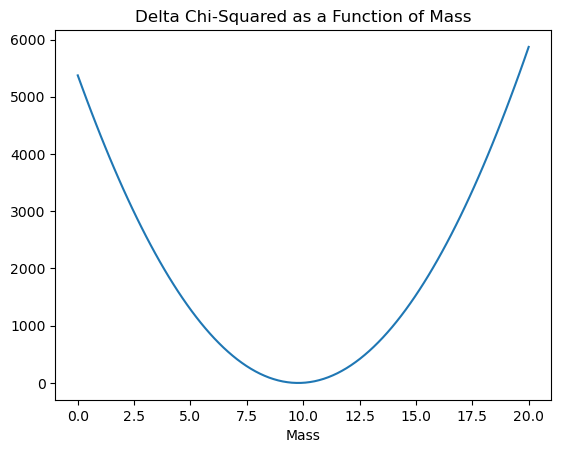

In [127]:
# Chi^2 function
bins = np.arange(0, 20, 0.5) # Bin size 0.5 from 0 to 20 GeV
counts, bins = np.histogram(data, bins=bins) # Get histogram info 
bin_centers = (bins[:-1] + bins[1:]) / 2 

def chi_2(m):
    gamma = 0.409
    def cpdf(d, m, gamma):
        return cauchy.pdf(d, loc=m, scale=gamma)
    # Calculte chi^2 value
    val = 0.5 * len(data) * cpdf(bin_centers, m, g0)
    return np.sum((counts - val) ** 2 / val)

# Find values for chi squared and min, then delta chi^2=chi^2-chi^2_min
m_range = np.linspace(0, 20, 100)
c2 = np.array([chi_2(m) for m in m_range])
c2_min = np.min(c2)
delta_c2 = c2 - c2_min 

# Plot delta chi^2
plt.plot(m_range, delta_c2)
plt.title('Delta Chi-Squared as a Function of Mass')
plt.xlabel('Mass')


#### Superpose −2 ln(𝐿/𝐿𝑚𝑎𝑥) in blue and 𝜒2 − 𝜒2

Text(0.5, 0, 'Mass')

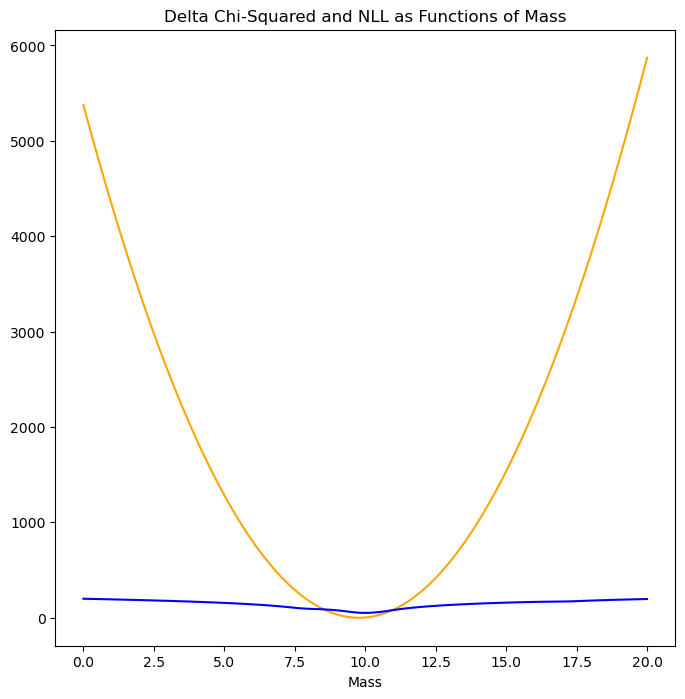

In [120]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(m_range, delta_c2, color='orange')
ax.plot(mvals, nll_1D, color='b')

ax.set_title('Delta Chi-Squared and NLL as Functions of Mass')
ax.set_xlabel('Mass')

# Bonus (3 points)
Following tutorial of the iminuit package below to obtain the best estimate of Max-
imum Likelihood method. Check consistenteny with your solutions in Task 2.
https://iminuit.readthedocs.io/en/stable/notebooks/generic_least_squares.html
See example results below (Ignore the number. Just for illustration purpose).

In [136]:
m = Minuit(l, m=m0)
m.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 50.28                      │              Nfcn = 15               │
│ EDM = 3.21e-14 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ m    │   9.99    │   0.14    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────┐
│   │      m │
├───┼────────┤
│ m │ 0.0204 │
└───┴────────┘

In [153]:
m = Minuit(Nll, params=[m0,g0], d=data)
m.migrad()

TypeError: bad operand type for abs(): 'list'